In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("myuber.csv")  

print("File loaded successfully!")


File loaded successfully!


# DATA ANALYSIS

In [20]:
df.info()
print("\nNumber of rows and columns:", df.shape)
print("\nColumn names:")
print(df.columns)

print("\nData types of each column:")
print(df.dtypes)
print("\nMissing value")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1154 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     1155 non-null   object        
 7   Month        1154 non-null   float64       
 8   Day          1154 non-null   float64       
 9   Hour         1154 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 99.3+ KB

Number of rows and columns: (1155, 10)

Column names:
Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Month', 'Day', 'Hour'],
      dtype='object')

Data types of each column:
START_DATE* 

In [18]:
df["END_DATE*"] = df["END_DATE*"].ffill()
df["CATEGORY*"] = df["CATEGORY*"].ffill()
df["START*"] = df["START*"].ffill()
df["STOP*"] = df["STOP*"].ffill()
df["PURPOSE*"]=df["PURPOSE*"].ffill()

df[["END_DATE*","CATEGORY*","START*","STOP*","PURPOSE*"]].isnull().sum()



END_DATE*    0
CATEGORY*    0
START*       0
STOP*        0
PURPOSE*     0
dtype: int64

In [19]:
df = df.drop_duplicates()
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


# FEATURE ENGINEERING

In [7]:

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"], errors="coerce")
df["END_DATE*"] = pd.to_datetime(df["END_DATE*"], errors="coerce")
print("\nConverted 'START_DATE*' and 'END_DATE*' into datetime format")


df["Month"] = df["START_DATE*"].dt.month
df["Day"] = df["START_DATE*"].dt.day
df["Hour"] = df["START_DATE*"].dt.hour
display(df.head())

print("\nCreated new columns: Month, Day, Hour")



Converted 'START_DATE*' and 'END_DATE*' into datetime format


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1.0,1.0,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,2.0,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1.0,2.0,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1.0,5.0,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1.0,6.0,14.0



Created new columns: Month, Day, Hour


# Total miles traveled by category (Business vs Personal)


Total miles by category:
CATEGORY*
Business    11487.0
Personal      717.7
Name: MILES*, dtype: float64


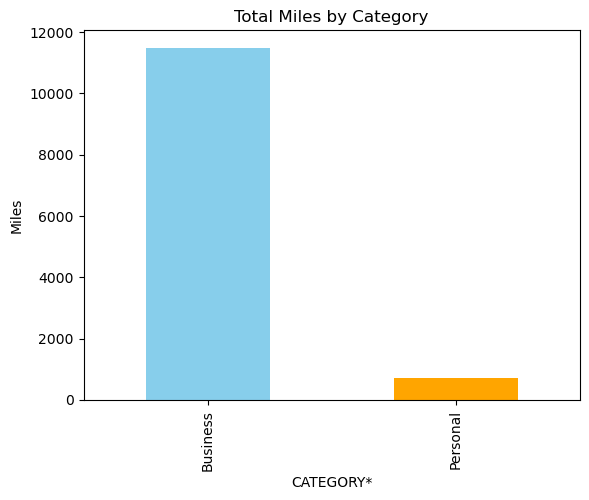

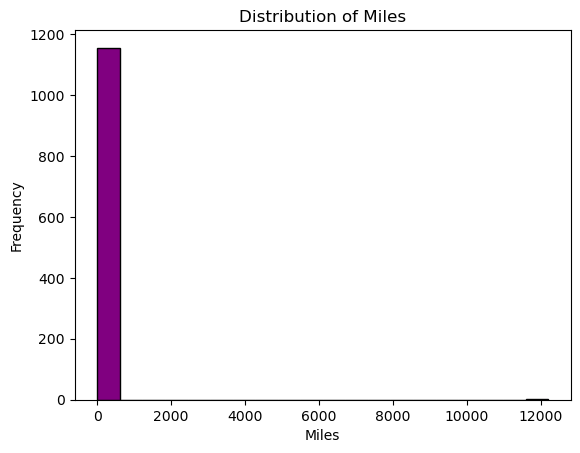

In [8]:
if "CATEGORY*" in df.columns:
    print("\nTotal miles by category:")
    print(df.groupby("CATEGORY*")["MILES*"].sum())

    df.groupby("CATEGORY*")["MILES*"].sum().plot(kind="bar", color=["skyblue","orange"])
    plt.title("Total Miles by Category")
    plt.ylabel("Miles")
    plt.show()

df["MILES*"].plot(kind="hist", bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Miles")
plt.xlabel("Miles")
plt.show()



# Total miles per month


Total miles per month:
Month
1.0      512.9
2.0      908.2
3.0     1693.9
4.0     1113.0
5.0      363.8
6.0      842.8
7.0     1224.6
8.0     1335.5
9.0      601.8
10.0    1810.0
11.0     816.9
12.0     981.3
Name: MILES*, dtype: float64


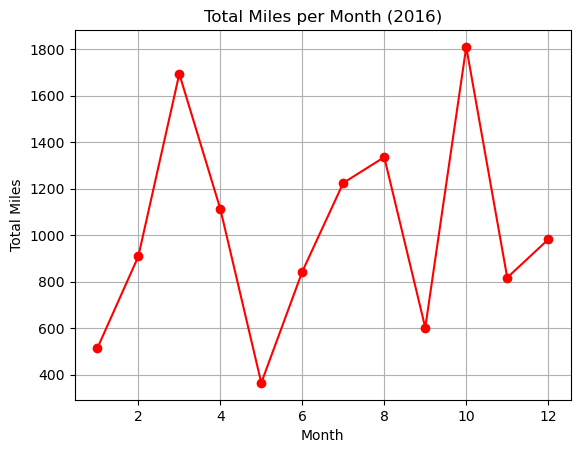

In [9]:
monthly_miles = df.groupby("Month")["MILES*"].sum()
print("\nTotal miles per month:")
print(monthly_miles)

monthly_miles.plot(kind="line", marker="o", color="red")
plt.title("Total Miles per Month (2016)")
plt.xlabel("Month")
plt.ylabel("Total Miles")
plt.grid(True)
plt.show()



# Average trip miles per category


Average trip miles per category:
CATEGORY*
Business    10.655844
Personal     9.320779
Name: MILES*, dtype: float64


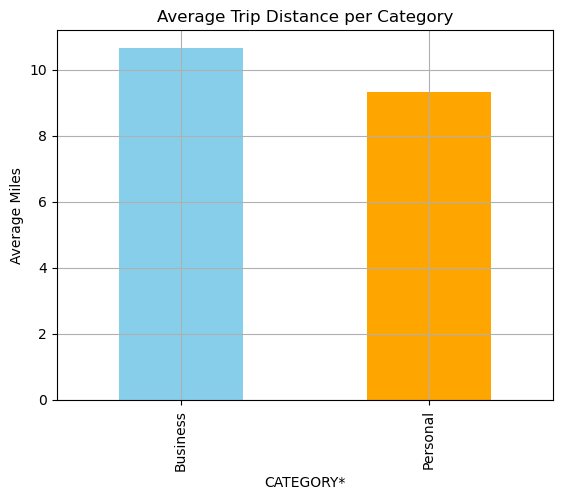

In [10]:
if "CATEGORY*" in df.columns:
    avg_miles_category = df.groupby("CATEGORY*")["MILES*"].mean()
    print("\nAverage trip miles per category:")
    print(avg_miles_category)

    # Bar chart
    avg_miles_category.plot(kind="bar", color=["skyblue","orange"])
    plt.title("Average Trip Distance per Category")
    plt.ylabel("Average Miles")
    plt.grid(True)
    plt.show()


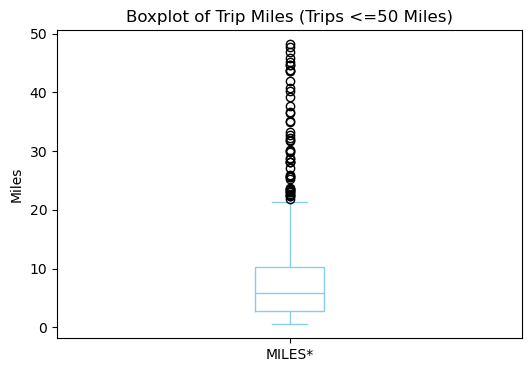

In [11]:
plt.figure(figsize=(6,4))
df[df["MILES*"]<=50]["MILES*"].plot(kind="box", color="skyblue")
plt.title("Boxplot of Trip Miles (Trips <=50 Miles)")
plt.ylabel("Miles")
plt.show()


Top 5 Trip Purposes:
PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Name: count, dtype: int64


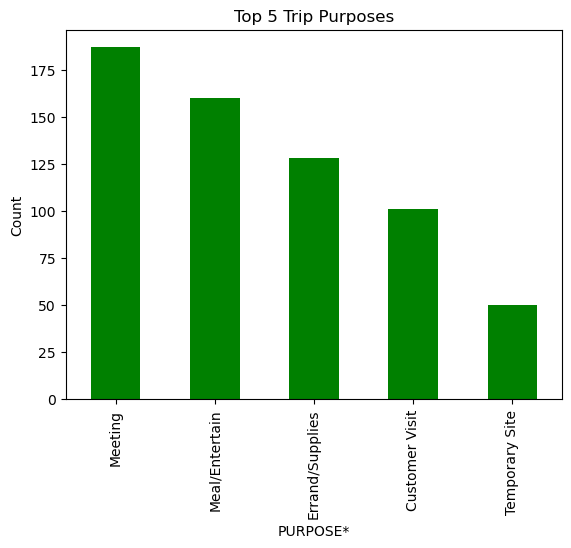

In [12]:
if "PURPOSE*" in df.columns:
    print("\nTop 5 Trip Purposes:")
    print(df["PURPOSE*"].value_counts().head())

    df["PURPOSE*"].value_counts().head(5).plot(kind="bar", color="green")
    plt.title("Top 5 Trip Purposes")
    plt.ylabel("Count")
    plt.show()

# Descriptive Statistics

,START_DATE*,END_DATE*,MILES*,Month,Day,Hour
count,1155,1155,1156.000000,1155.000000,1155.000000,1155.000000
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,21.115398,6.982684,16.309091,14.696104
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,1.000000,1.000000,0.000000
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,2.900000,3.500000,9.000000,12.000000
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,6.000000,7.000000,17.000000,15.000000
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,10.400000,10.000000,24.000000,18.000000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,12204.700000,12.000000,31.000000,23.000000
std,NaN,NaN,359.299007,3.544915,8.713157,4.575226



Mean of MILES*: 21.115397923875435
Median of MILES*: 6.0
Mode of MILES*: 9.9
Variance of MILES*: 129095.77671507963


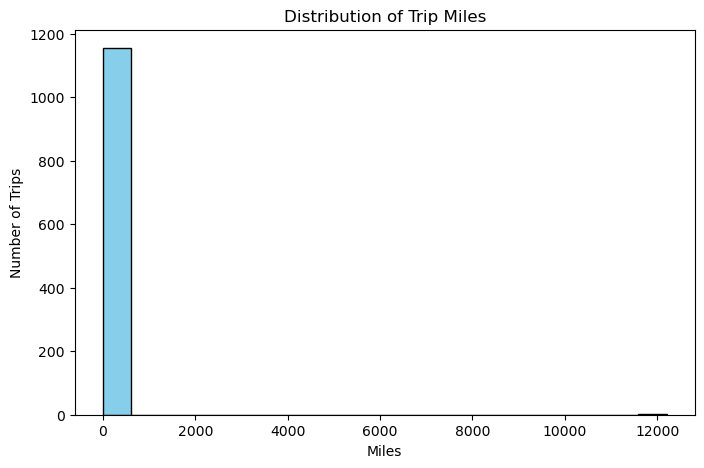

In [13]:
numeric_stats = df.describe()
display(numeric_stats)
print("\nMean of MILES*:",df["MILES*"].mean())
print("Median of MILES*:", df["MILES*"].median())
print("Mode of MILES*:", df["MILES*"].mode()[0])
print("Variance of MILES*:", df["MILES*"].var())

plt.figure(figsize=(8,5))
df["MILES*"].plot(kind="hist", bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Trip Miles")
plt.xlabel("Miles")
plt.ylabel("Number of Trips")
plt.show()


In [14]:
skewness = df["MILES*"].skew()
print("Skewness of Trip Miles:", skewness)

Skewness of Trip Miles: 33.817609504415614


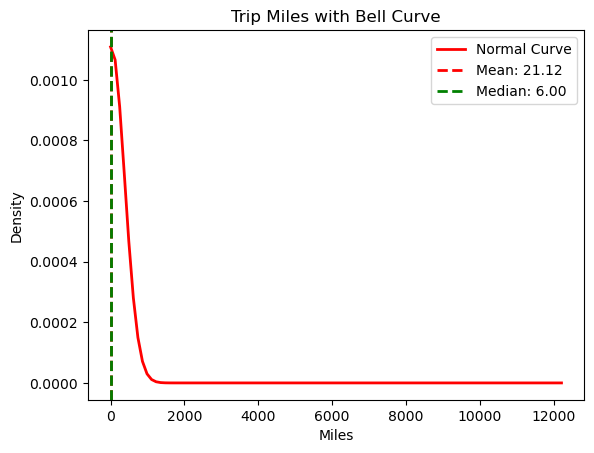

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = df["MILES*"]

mu, sigma = data.mean(), data.std()
x = np.linspace(min(data), max(data), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Curve')

plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mu:.2f}')
plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {data.median():.2f}')

plt.title("Trip Miles with Bell Curve")
plt.xlabel("Miles")
plt.ylabel("Density")
plt.legend()
plt.show()


In [16]:
corr = df["MILES*"].corr(df["Hour"])
print("Correlation between Miles and Hours:", corr)


Correlation between Miles and Hours: 0.019794517641930402


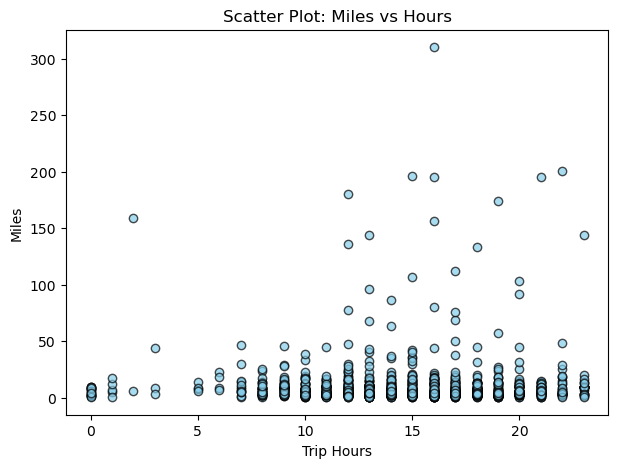

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df["Hour"], df["MILES*"], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Trip Hours")
plt.ylabel("Miles")
plt.title("Scatter Plot: Miles vs Hours")
plt.show()


Skewness before transformation: 33.80
Skewness after Quantile Transformation: -0.17


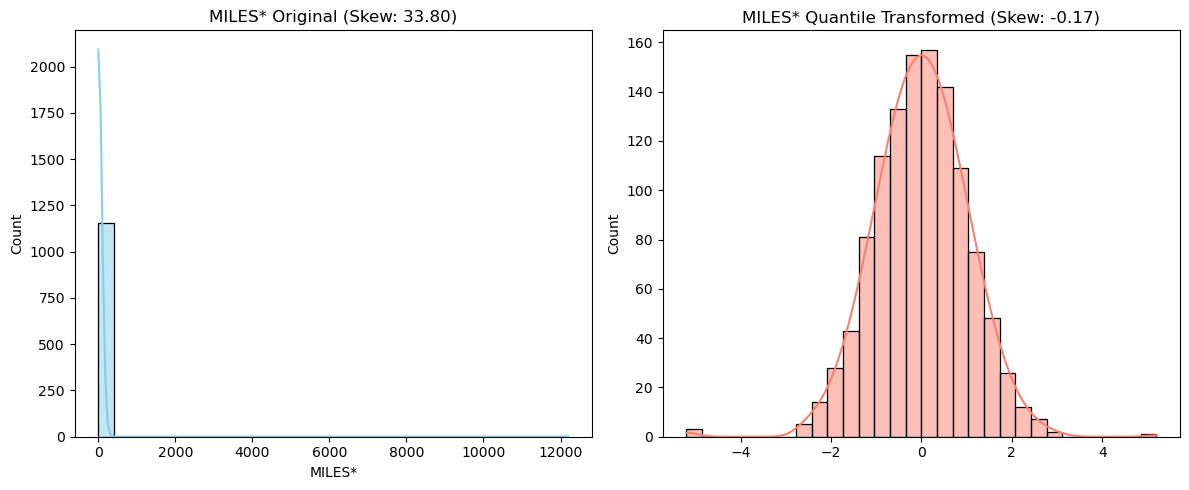

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
import pandas as pd

# Numeric column
num_col = 'MILES*'
data = df[[num_col]].copy()  

qt = QuantileTransformer(output_distribution='normal', random_state=0)

data_transformed = qt.fit_transform(data)
data_transformed = pd.Series(data_transformed.flatten())  

print(f"Skewness before transformation: {data[num_col].skew():.2f}")
print(f"Skewness after Quantile Transformation: {data_transformed.skew():.2f}")

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data[num_col], kde=True, color='skyblue', bins=30)
plt.title(f"{num_col} Original (Skew: {data[num_col].skew():.2f})")

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True, color='salmon', bins=30)
plt.title(f"{num_col} Quantile Transformed (Skew: {data_transformed.skew():.2f})")

plt.tight_layout()
plt.show()


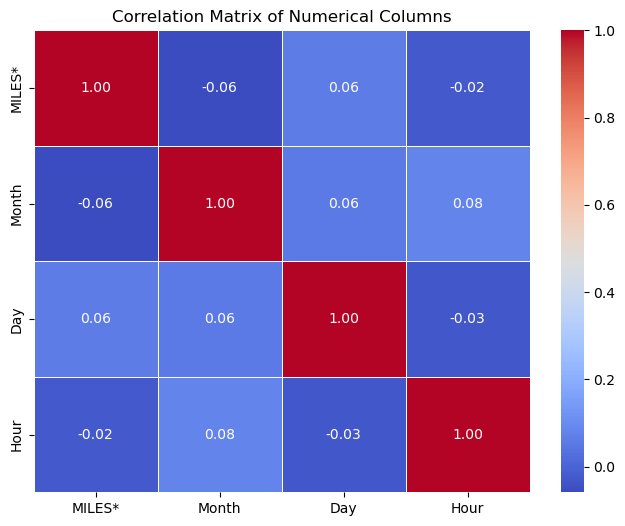

In [28]:

num_cols = ['MILES*', 'Month', 'Day', 'Hour']

qt = QuantileTransformer(output_distribution='normal', random_state=0)
df_qt = df[num_cols].copy()
df_qt['MILES*'] = qt.fit_transform(df_qt[['MILES*']])

corr_matrix = df_qt.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()
